In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#load packages
import sys #access to system parameters
print("Python version: {}".format(sys.version))

import pandas as pd#collection of functions for data processing and analysis
print("pandas version: {}".format(pd.__version__))

import matplotlib #collection of functions for scientific visualisation
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}".format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advanced mathematics
print("SciPy version: {}".format(sp.__version__))

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}".format(IPython.__version__))

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}".format(sklearn.__version__))

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

Python version: 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:45:18) [GCC 12.3.0]
pandas version: 2.2.3
matplotlib version: 3.7.5
NumPy version: 1.26.4
SciPy version: 1.14.1
IPython version: 8.21.0
scikit-learn version: 1.2.2


In [75]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [76]:
#import data from file
data_raw = pd.read_csv('/kaggle/input/titanic/train.csv')

#datasets should be broken into 3 splits: train, test, and (final) validation
#the test file provided is the validation file for competition submission
#we will split the train set into train and test data in future session
data_val = pd.read_csv('/kaggle/input/titanic/test.csv')

#to play with our data we'll create a copy
data1 = data_raw.copy(deep=True)

#since data1 is passed by referece, we can clean both data1(copy) and data_val at once
data_cleaner = [data1, data_val]

In [77]:
#preview data
print(data_raw.info())

data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
579,580,1,3,"Jussila, Mr. Eiriik",male,32.0,0,0,STON/O 2. 3101286,7.9250,NaN,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
743,744,0,3,"McNamee, Mr. Neal",male,24.0,1,0,376566,16.1000,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
573,574,1,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q
514,515,0,3,"Coleff, Mr. Satio",male,24.0,0,0,349209,7.4958,NaN,S
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S


## The 4 C's of Data Cleaning:
## Correcting, Completing, Creating, Converting
1) Correcting aberrant values and outliers
2) Completing missing information
3) Creating new features for analysis 
4) Converting fields to the correct format for calculations and persentation

In [78]:
print('(Data 1)Train columns with null values:\n', data1.isnull().sum())
print('-'*10)

print('(Data Val)Test columns with null values:\n', data_val.isnull().sum())
print('-'*10)

(Data 1)Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
(Data Val)Test columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


In [79]:
data_raw.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [80]:
###COMPLETING: complete or delete missing value in the training and validation dataset
for dataset in data_cleaner:
    #Complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    
    #Complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
    
    #Complete missing fare with median 
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)

#delete the PassengerID, Cabin, Ticket columns from the train dataset
drop_column = ['PassengerId', 'Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace=True)

print('(Data 1)Train columns with null values:\n', data1.isnull().sum())
print('-'*10)
print('(Data Val)Test columns with null values:\n', data_val.isnull().sum())

(Data 1)Train columns with null values:
 Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
(Data Val)Test columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


# Cleaning Data

In [81]:
###CREATE: Feature Engineering for train and test/validation dataset
for dataset in data_cleaner:
    #Discrete variables (+1 to include passenger themselves)
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    #initialize to yes/1 is alone
    dataset['IsAlone'] = 1 
    #update to no/0 if family size is greater than 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0
    #splitting title from name
    dataset['Title'] = dataset['Name'].str.split(",", expand=True)[1]\
    .str.split(".", expand=True)[0]
    
    #Continuous variable bins; qcut vs cut
    #qcut seperate by quntiles, the bins are equally spaced
    #cut seperate by values, the bins are unequally spaced 
    #Fare bins using qcut or frequency bins 
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    
    #Age bins using cut or value bins
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    
#cleanup rare title names
title_names = data1['Title'].value_counts() < 10
#apply lambda function to replace Titles with 'misc' that are lesser than count of 10
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
#remove leading white space from title
data1['Title'] = data1['Title'].str.strip()
print(data1['Title'].value_counts())

Title
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: count, dtype: int64


In [82]:
#previiew data again
#train dataset info
data1.info()
#test dataset info
data_val.info()
data1.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
490,0,3,"Hagland, Mr. Konrad Mathias Reiersen",male,28.0,1,0,19.9667,S,2,0,Mr,"(14.454, 31.0]","(16.0, 32.0]"
313,0,3,"Hendekovic, Mr. Ignjac",male,28.0,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
56,1,2,"Rugg, Miss. Emily",female,21.0,0,0,10.5000,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,C,1,1,Miss,"(31.0, 512.329]","(32.0, 48.0]"
841,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,10.5000,S,1,1,Mr,"(7.91, 14.454]","(-0.08, 16.0]"
729,0,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,7.9250,S,2,0,Miss,"(7.91, 14.454]","(16.0, 32.0]"
140,0,3,"Boulos, Mrs. Joseph (Sultana)",female,28.0,0,2,15.2458,C,3,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"
274,1,3,"Healy, Miss. Hanora ""Nora""",female,28.0,0,0,7.7500,Q,1,1,Miss,"(-0.001, 7.91]","(16.0, 32.0]"
49,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,17.8000,S,2,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"
622,1,3,"Nakid, Mr. Sahid",male,20.0,1,1,15.7417,C,3,0,Mr,"(14.454, 31.0]","(16.0, 32.0]"


### Convert Formats (Encode Categorial variables)
Converting categorical data into dummy variables for mathematical analysis
In this step, we will also define our x (independent variables) and y (dependent variables) for data modelling

In [83]:
#CONVERT: convert objects to category using Label Encoder for train and test dataset

#code categorical data
label = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

#define y variable aka target
Target = ['Survived']

#define x variables for original features as feature selection
data1_x = ['Sex', 'Pclass', 'Embarked', 'Title',\
           'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']
#pretty name/values for charts
data1_x_calc = ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code',\
                'SibSp', 'Parch', 'Age', 'Fare']
data1_xy = Target + data1_x 
print('Original X Y: ', data1_xy, '\n')

#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass','Embarked_Code','Title_Code','FamilySize',\
               'AgeBin_Code','FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')

#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x]).astype(int)
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy)

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs']


In [84]:
data1_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22,7,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38,71,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26,7,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35,53,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35,8,1,1,0,1,0,0,1,0,0,0,1,0


## Da-Double Check Cleaned Data

In [85]:
print('(Data 1)Train columns with null values:\n', data1.isnull().sum())
print('-'*10)
print(data1.info())
print('-'*10)

print('(Data Val)Test columns with null values:\n', data_val.isnull().sum())
print('-'*10)
print(data_val.info())
print('-'*10)

(Data 1)Train columns with null values:
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked      

In [86]:
data_raw.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Split Training and Testing Data
Using sklearn function to split the training data in two datasets; 75/25 split. So, we don't overfit our model

In [87]:
#Split train and test data with function defaults
#random_state -> seed or control random number generator
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split\
(data1[data1_x_calc], data1[Target], random_state=0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split\
(data1[data1_x_bin], data1[Target], random_state=0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split\
(data1_dummy[data1_x_dummy], data1[Target], random_state=0)

print("Data1 Shape: ",data1.shape)
print("Train1 Shape: ",train1_x.shape)
print("Test1 Shape: ",test1_x.shape)

train1_x_bin.head()

Data1 Shape:  (891, 19)
Train1 Shape:  (668, 8)
Test1 Shape:  (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


## Perform Exploratory Analysis with Statistics

In [88]:
#Discrete Variable Correlation by Survival using group by 

for x in data1_x:
    if data1[x].dtype != 'float64':
        print('Survival Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1 

In [89]:
#using crosstabs
print(pd.crosstab(data1['Title'],data1[Target[0]]))

Survived    0    1
Title             
Master     17   23
Misc       15   12
Miss       55  127
Mr        436   81
Mrs        26   99


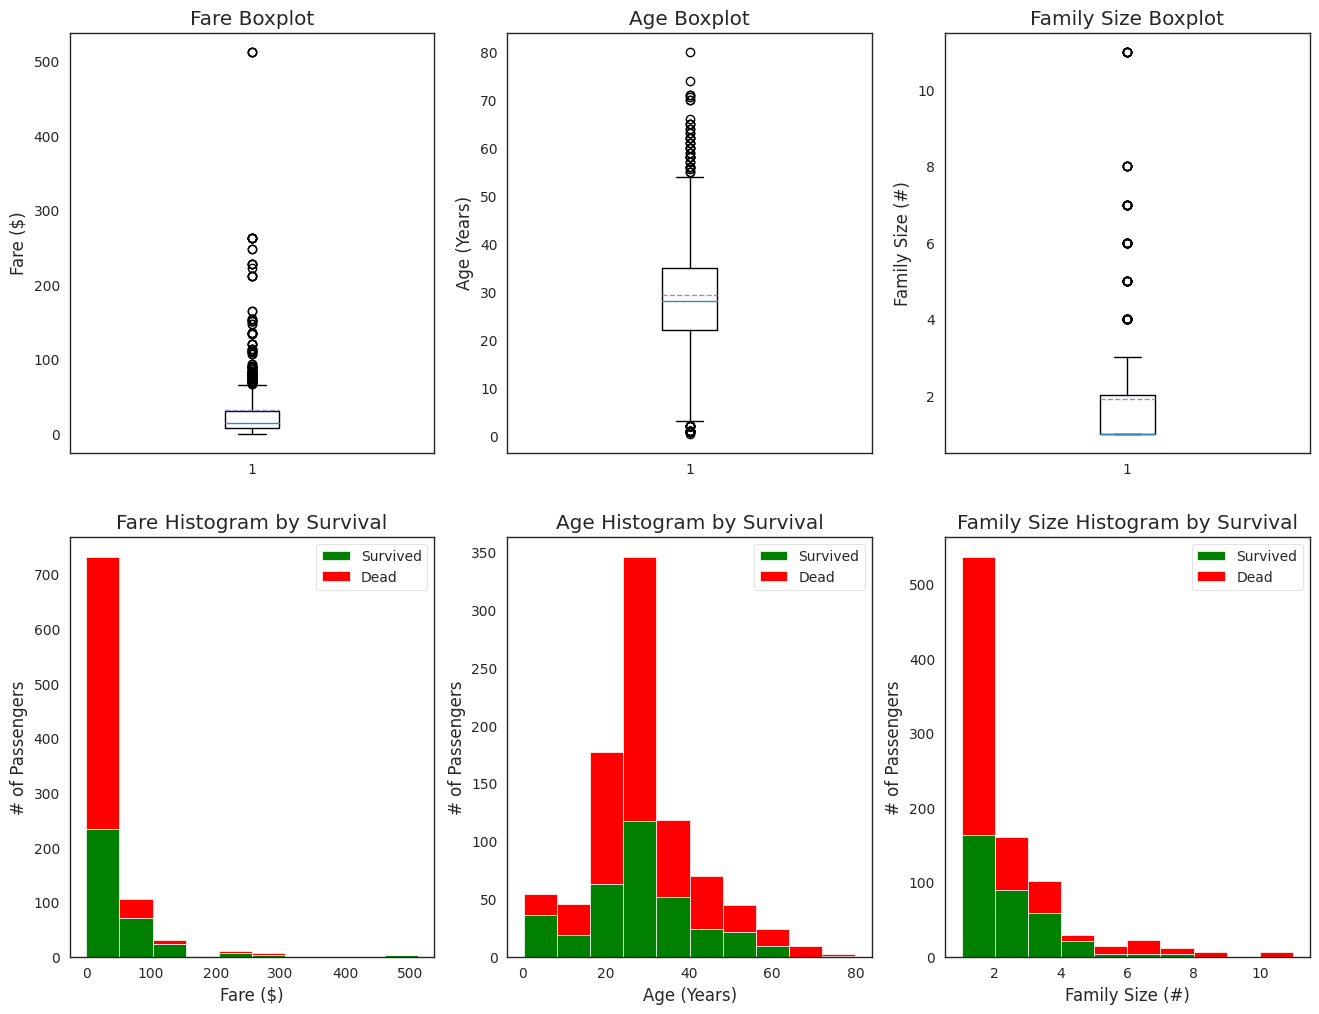

In [90]:
#graph distribution of quantitative data
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans=True, meanline=True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(x=data1['Age'], showmeans=True, meanline=True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(x=data1['FamilySize'], showmeans=True, meanline=True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x=[data1[data1['Survived']==1]['Fare'],  data1[data1['Survived']==0]['Fare']],
 stacked=True,
 color=['g','r'],
 label=['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x=[data1[data1['Survived']==1]['Age'],  data1[data1['Survived']==0]['Age']],
 stacked=True,
 color=['g','r'],
 label=['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x=[data1[data1['Survived']==1]['FamilySize'],  data1[data1['Survived']==0]['FamilySize']],
 stacked=True,
 color=['g','r'],
 label=['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

<Axes: xlabel='FamilySize', ylabel='Survived'>

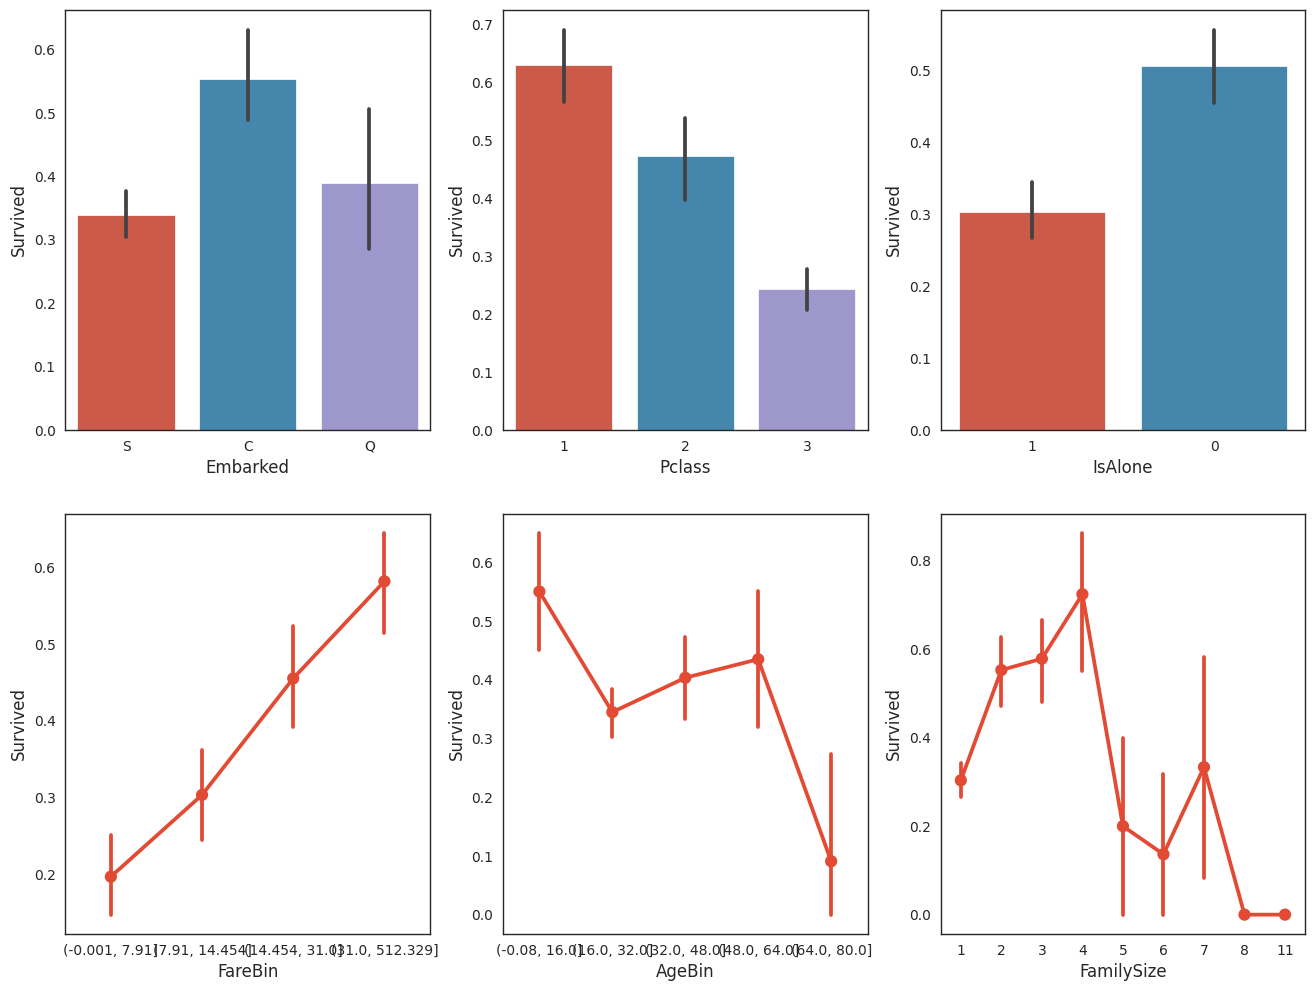

In [91]:
#we will use seaborn graphics for multi-variate comparison
fig, saxis = plt.subplots(2,3,figsize=(16,12))

sns.barplot(x='Embarked', y='Survived', data=data1, ax=saxis[0,0])
sns.barplot(x='Pclass', y='Survived', order=[1,2,3], data=data1, ax=saxis[0,1])
sns.barplot(x='IsAlone', y='Survived', order=[1,0], data=data1, ax=saxis[0,2])

sns.pointplot(x='FareBin', y='Survived', data=data1, ax=saxis[1,0])
sns.pointplot(x='AgeBin', y='Survived', data=data1, ax=saxis[1,1])
sns.pointplot(x='FamilySize', y='Survived', data=data1, ax=saxis[1,2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

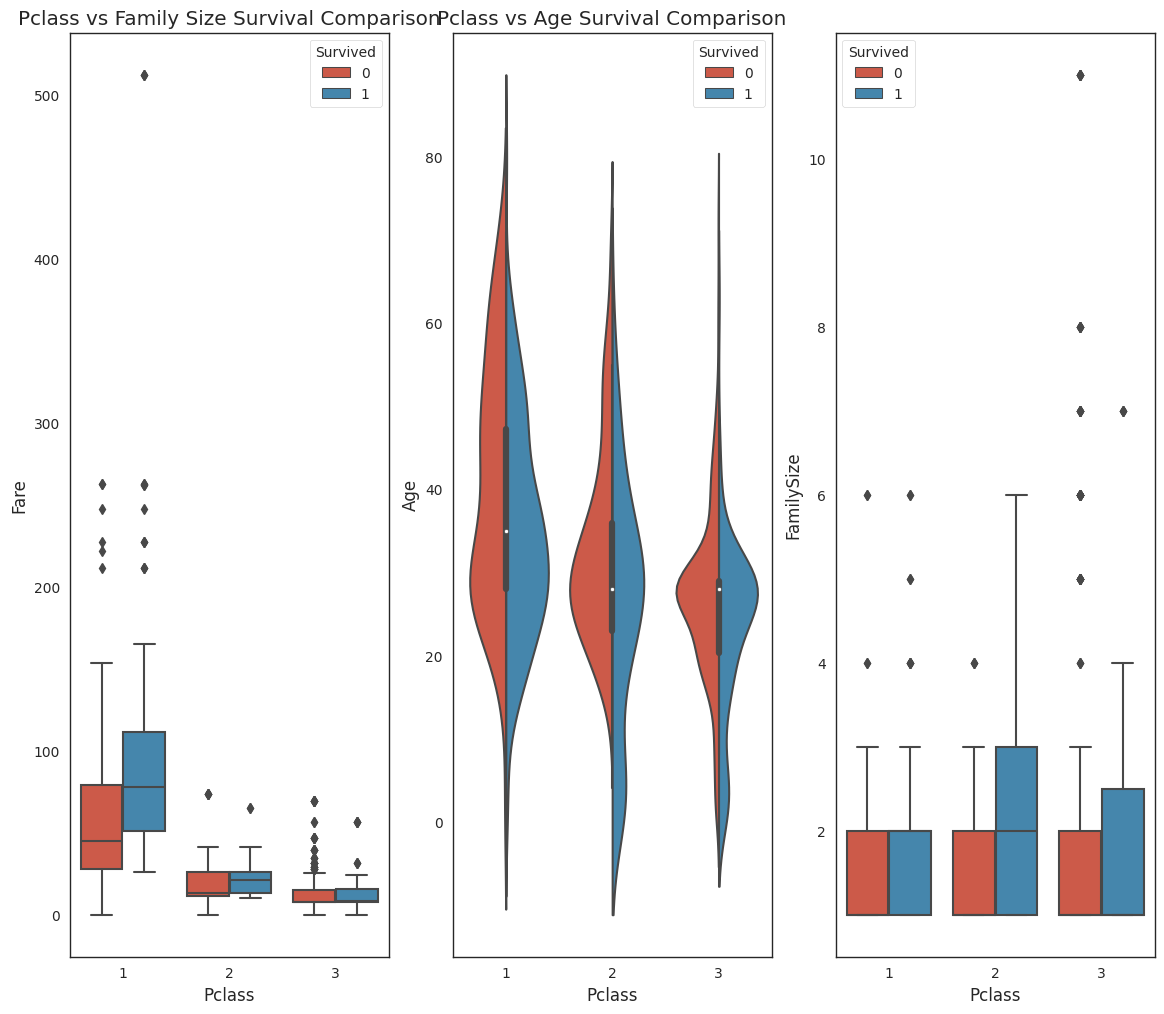

In [92]:
#graph distribution of qualitative data:Pclass
#we know class mattered in survival, now let's compare class and 2nd feature
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=data1, ax=axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data1, split=True, ax=axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x='Pclass', y='FamilySize', hue='Survived', data=data1, ax=axis3)
axis1.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

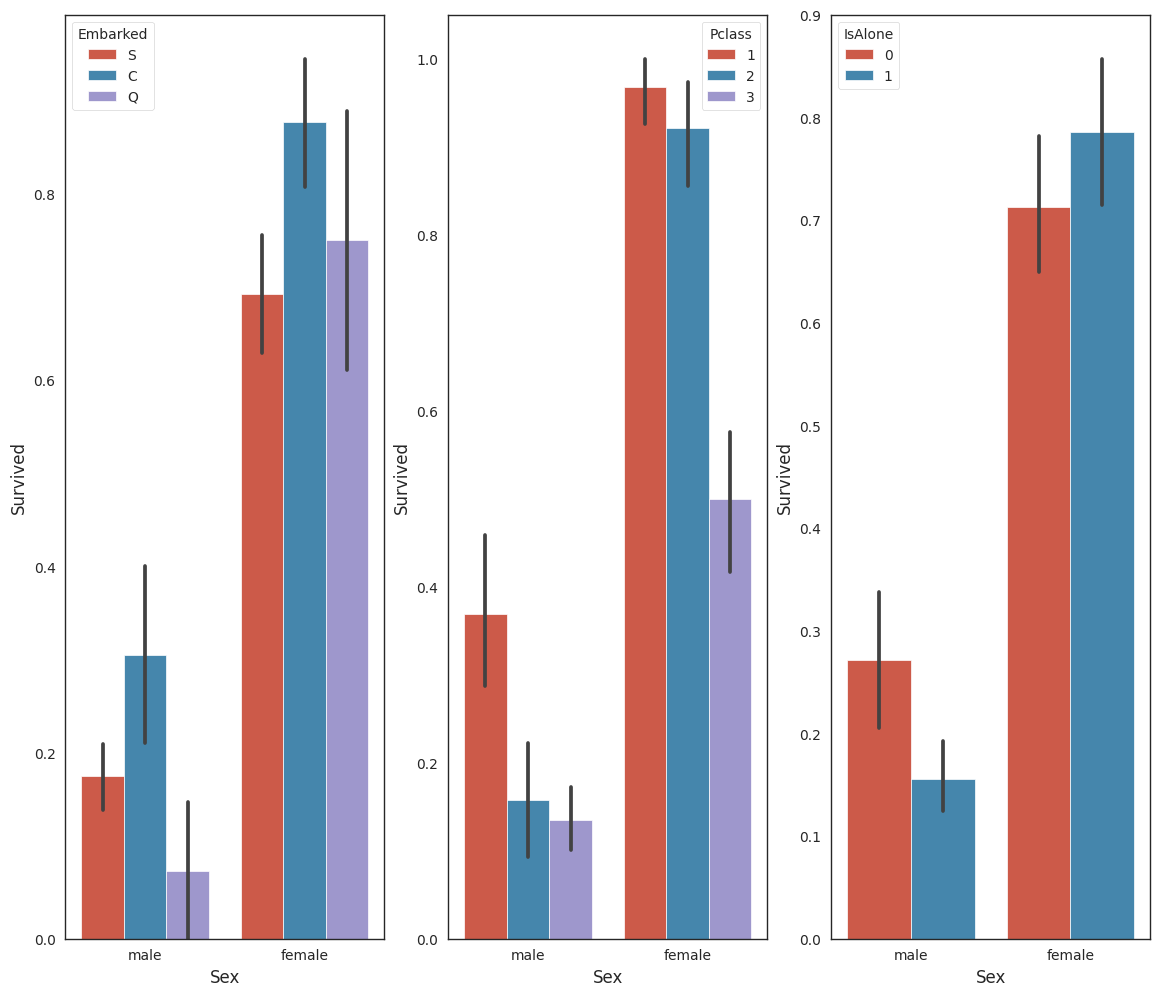

In [93]:
#graph distribution of qualitative data: Sex
#we know sex mattered in survival, now let's compare sex and a 2nd feature
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x='Sex', y='Survived', hue='Embarked', data=data1, ax=qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x='Sex', y='Survived', hue='Pclass', data=data1, ax=qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x='Sex', y='Survived', hue='IsAlone', data=data1, ax=qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

<Axes: xlabel='Pclass', ylabel='Survived'>

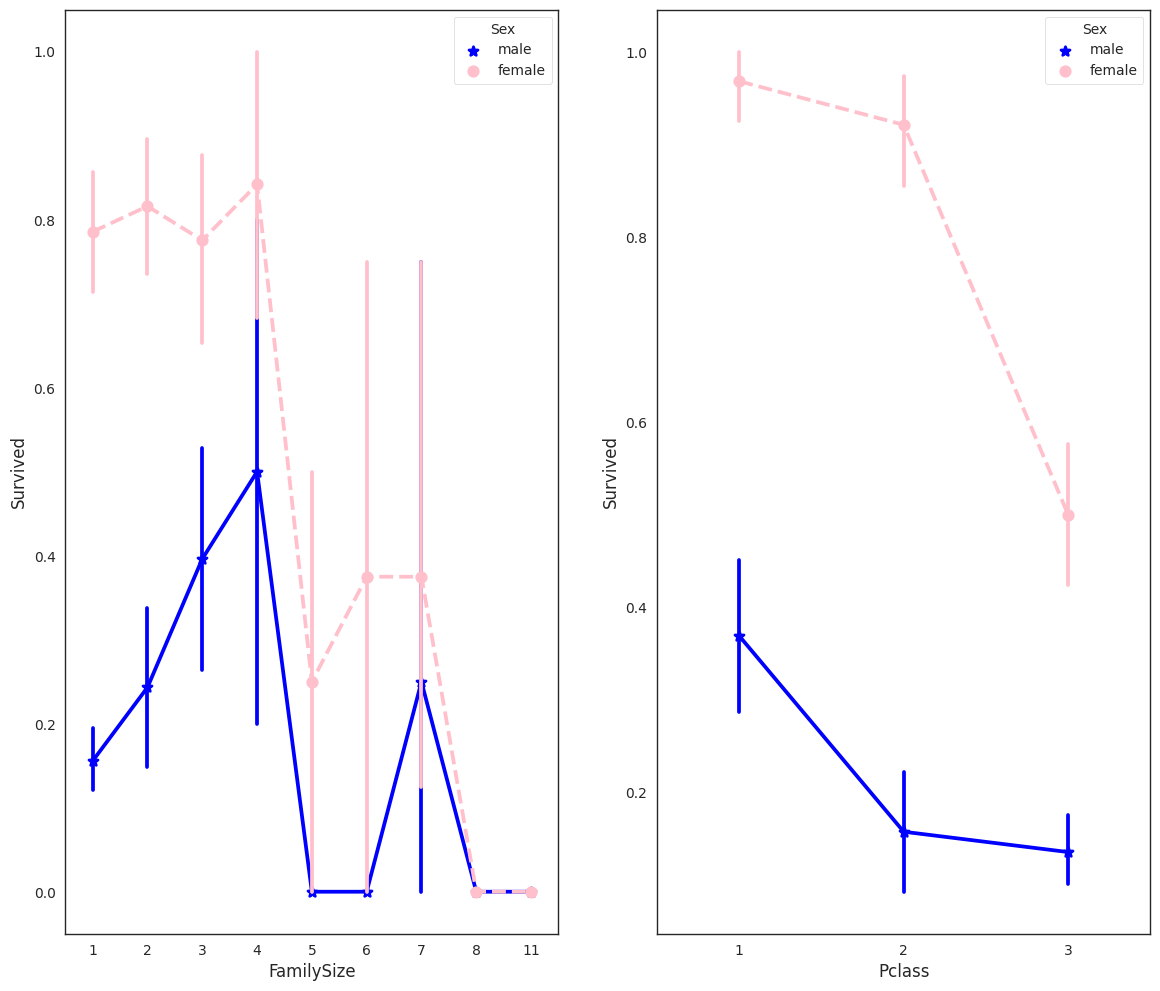

In [94]:
#more side-by-size comparisons
fig, (maxis1, maxis2) = plt.subplots(1,2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x='FamilySize', y='Survived', hue='Sex', data=data1,
              palette={'male':'blue', 'female':'pink'},
              markers=['*','o'],
              linestyles=['-','--'],
              ax=maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=data1,
              palette={'male':'blue', 'female':'pink'},
              markers=['*','o'],
              linestyles=['-','--'],
              ax=maxis2)

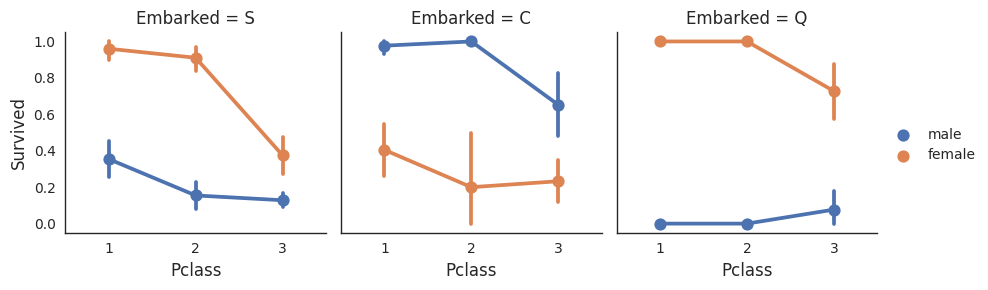

In [95]:
#how does embark port factor with class, sex, and survival compare
e = sns.FacetGrid(data1, col='Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette='deep')
e.add_legend()

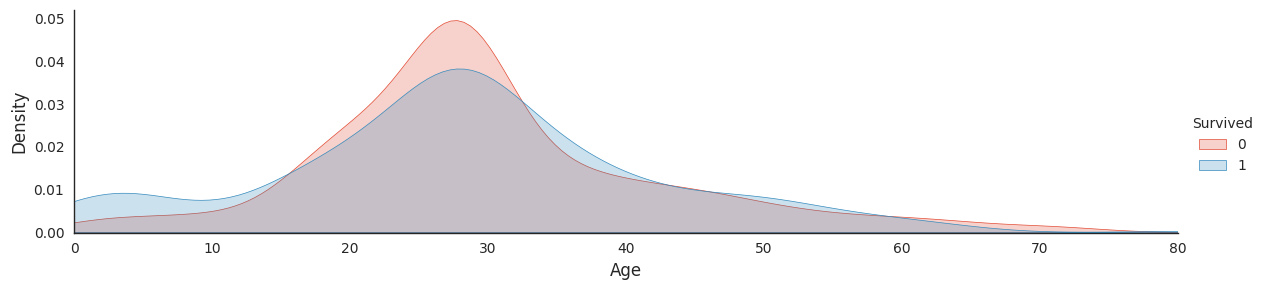

In [96]:
#plot distributions of age of passengers who survived or did not survived
a = sns.FacetGrid(data1,hue='Survived',aspect=4)
a.map(sns.kdeplot,'Age',shade=True)
a.set(xlim=(0, data1['Age'].max()))
a.add_legend()

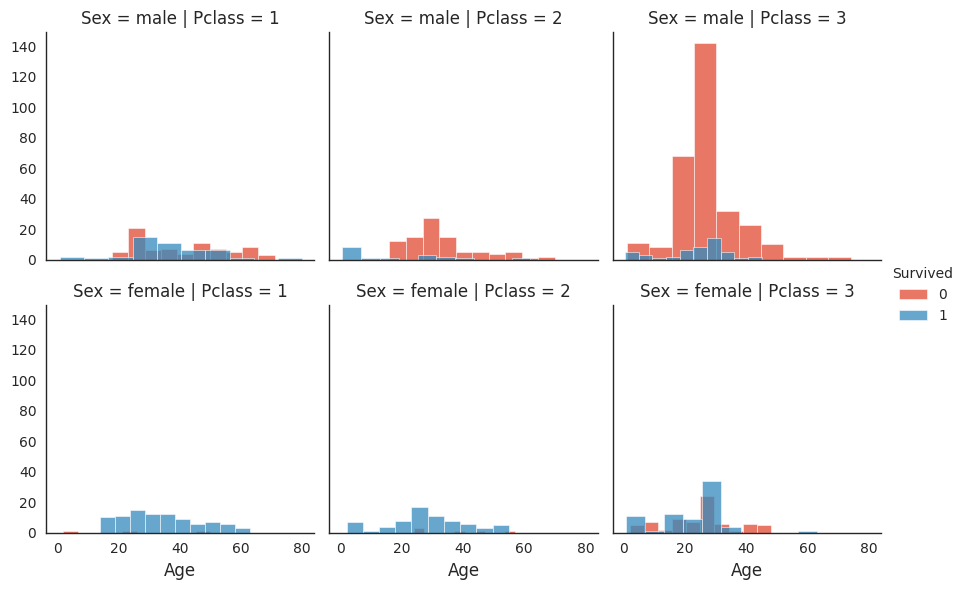

In [97]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(data1,row='Sex', col='Pclass', hue='Survived')
h.map(plt.hist, 'Age', alpha=.75)
h.add_legend()

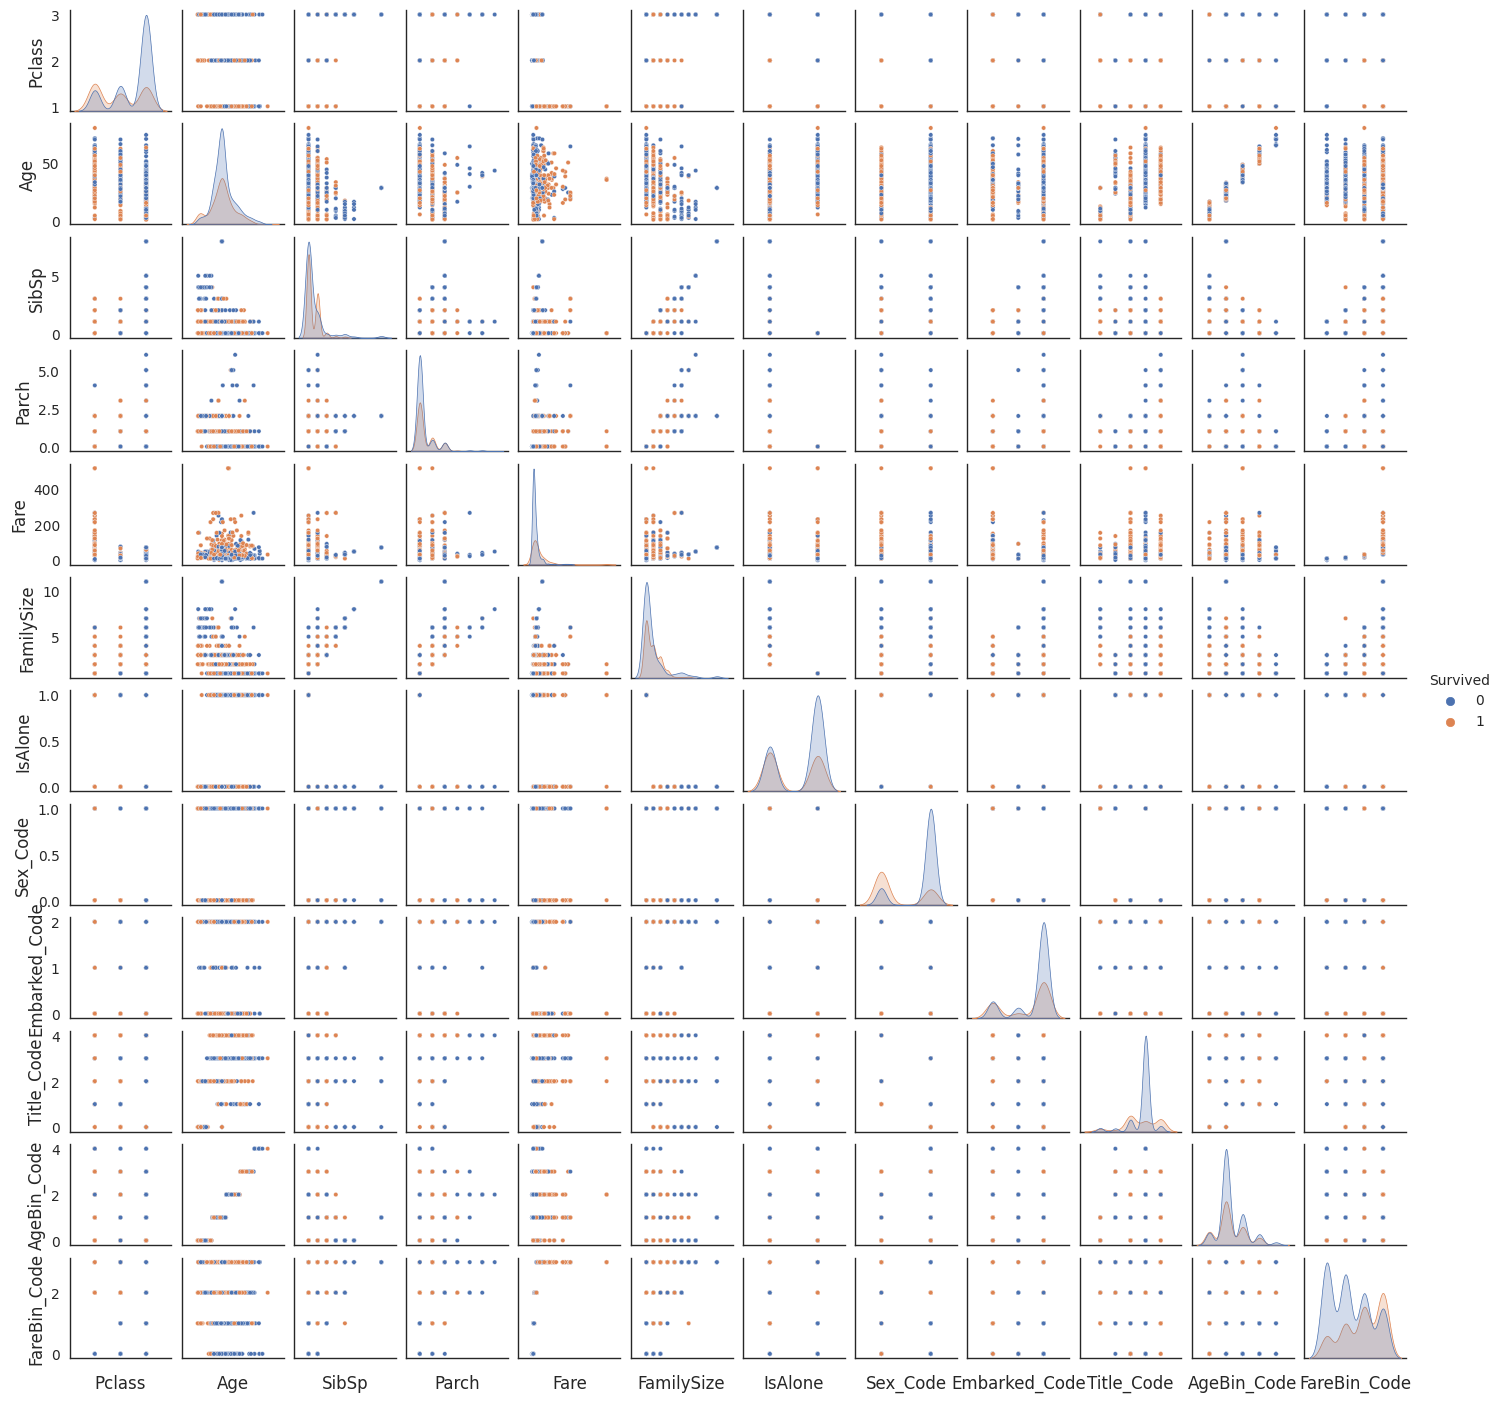

In [98]:
#pair plots of entire dataset
pp = sns.pairplot(data1, hue='Survived', palette='deep',size=1.2, diag_kind='kde',
                  diag_kws=dict(shade=True), plot_kws=dict(s=10))
pp.set(xticklabels=[])

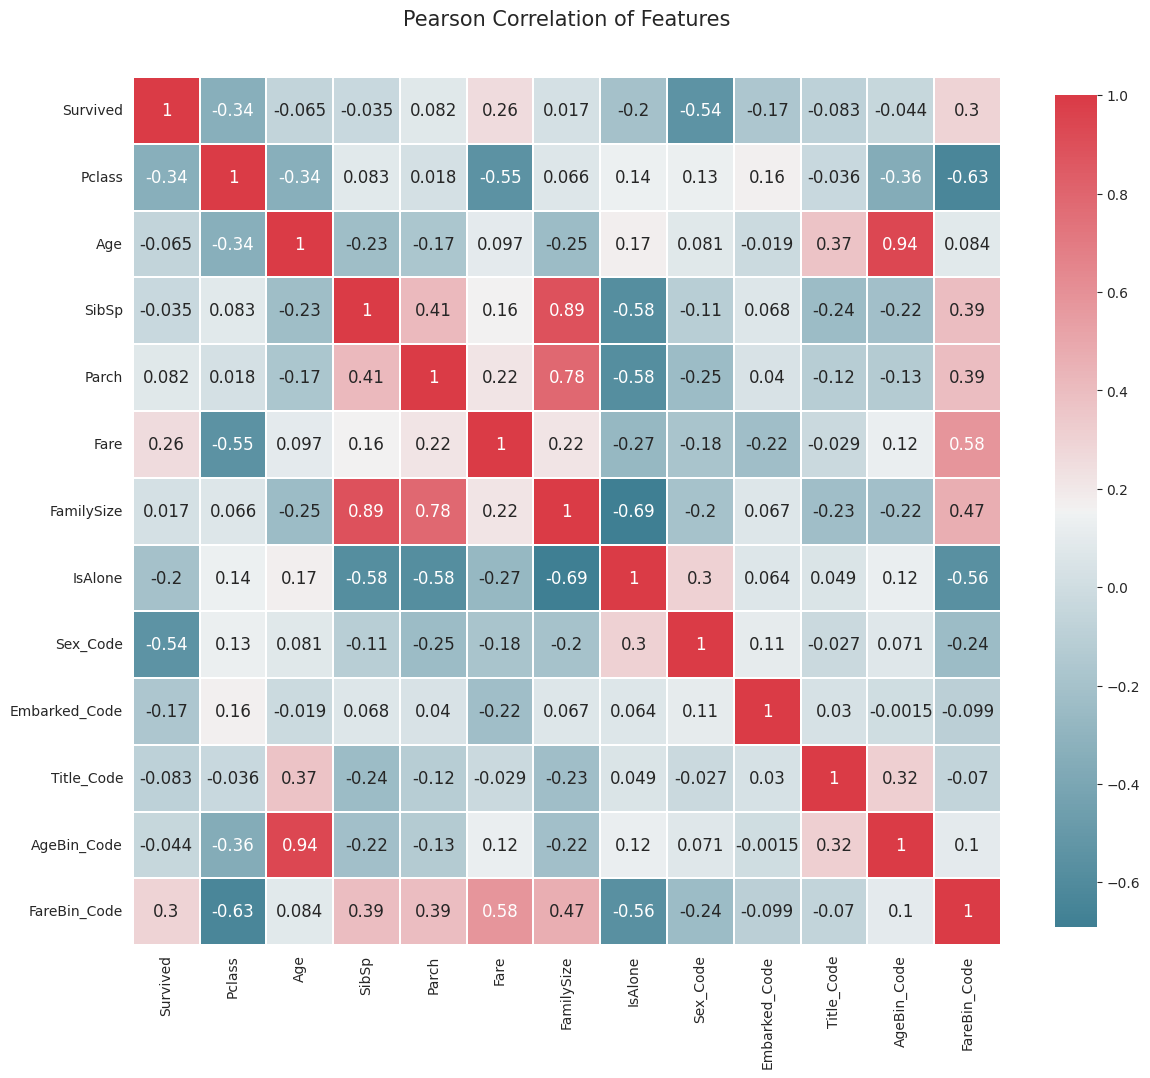

In [99]:
#correlation heatmap of dataset

heatmap_col = ['Survived', 'Pclass','Age','SibSp','Parch','Fare','FamilySize','IsAlone','Sex_Code',
'Embarked_Code','Title_Code','AgeBin_Code','FareBin_Code']


def correlation_heatmap(df):
    _, ax = plt.subplots(figsize=(14,12))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    
    _ = sns.heatmap(
        df.corr(),
        cmap=colormap,
        square=True,
        cbar_kws={'shrink':.9},
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0,linecolor='white',
        annot_kws={'fontsize':12}
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    
correlation_heatmap(data1[heatmap_col])

# Model Data

Machine learning can be categorized as:
1) Supervised Learning
2) Unsupervised Learning
3) Reinforced Learning

Supervised learning is where you train the model by presenting it a training dataset that includes the correct answer.
Unsupervised learning is where you train the model using a training dataset that does not include the correct answer.
Reinforced learning is a hybrid of both, where the model is not given the correct answer immediately, but later after a sequence of events to reinforce learning.

Machine learning algorithms can be reduced into 4 categories:
1) classification
2) regression
3) clustering
4) dimensionality reduction


In [100]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #Generalized Linear Models(GLM)
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Naive Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    #xgboost
    XGBClassifier()
]

#split dataset in cross-validation with this splitter class
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=.3, train_size=.6, random_state=0)
#run the model 10x with 60/30 split intentionally leaving out the 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean',\
               'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:
    
    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target],\
                                               cv=cv_split, return_train_score=True)
    
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    #if this is a non-bias random sample, then +/-3 standard deviation (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
    
    
    #save MLA predictions
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1
    
#print and sort table
MLA_compare.sort_values(by=['MLA Test Accuracy Mean'], ascending=False, inplace=True)
MLA_compare
    

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.895131,0.831343,0.068421,0.197692
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.835206,0.827612,0.040916,0.044336
21,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.890824,0.826866,0.054656,0.054234
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.834082,0.826119,0.045663,0.052911
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.866667,0.822761,0.049873,0.098353
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.895131,0.822388,0.06176,0.155132
1,BaggingClassifier,"{'base_estimator': 'deprecated', 'bootstrap': ...",0.8897,0.821269,0.059539,0.027792
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895131,0.820896,0.05795,0.004177
18,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895131,0.814179,0.061271,0.003857
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': 'de...",0.820412,0.81194,0.049861,0.099021


Text(0, 0.5, 'Algorithm')

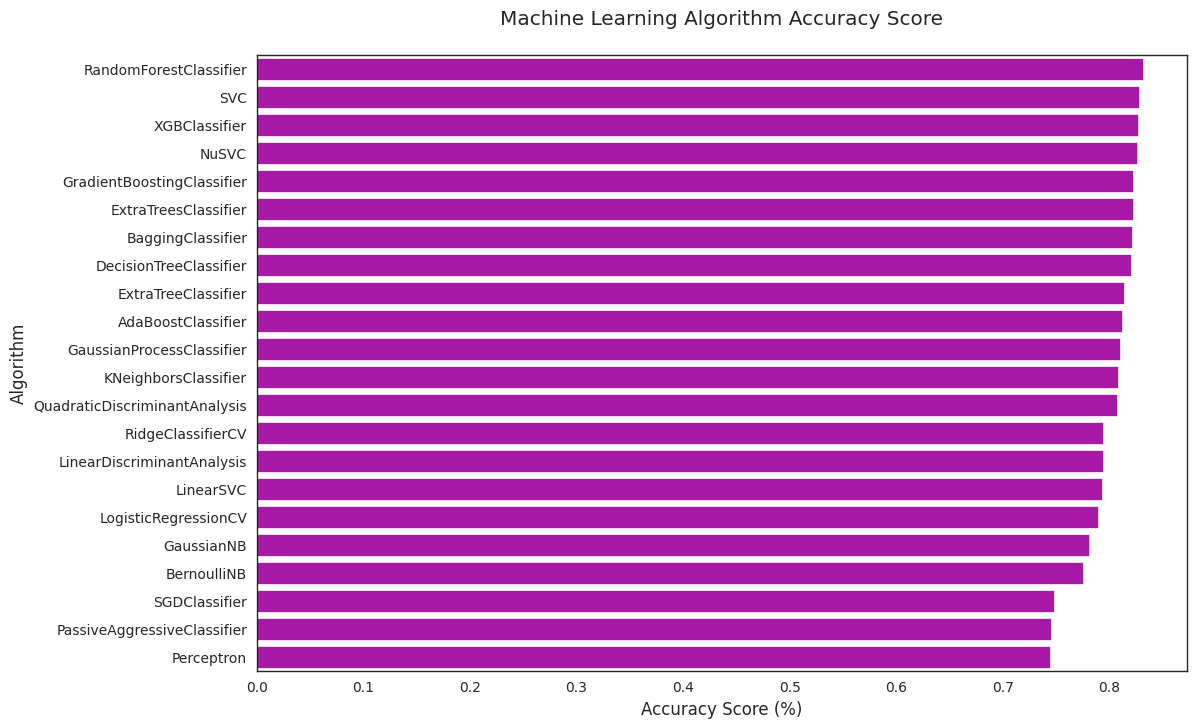

In [101]:
#barplot
sns.barplot(x='MLA Test Accuracy Mean', y='MLA Name', data=MLA_compare, color='m')

#prettify using pylplot

plt.title("Machine Learning Algorithm Accuracy Score\n")
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [102]:
#This is a handmade model (decision tree) for learning purpose only.

#Coin flip model with random 1/survived 0/died
#iterate over dataFrame rows as (index, Series) pairs:
for index, row in data1.iterrows():
    #random number generator
    if random.random()>.5: #random float x, 0.0 <= x <= 1.0
        data1.loc[index, 'Random_Predict'] = 1 #predict survived/1
    else:
        data1.loc[index, 'Random_Predict'] = 0 #predict died/0

#score random guess of survival. Using shortcut 1 = Right, and 0 = Wrong Guess
#the mean of the column will then equal the accuracy 
data1['Random_Score'] = 0 #assuming predictions wrong
#set to 1 for correct prediction
data1.loc[(data1['Survived'] == data1['Random_Predict']), 'Random_Score'] = 1 
print('Coin Flip Model Accuracy: {:.2f}%'.format(data1['Random_Score'].mean()*100))

#Using scikit's accuracy_score function to save few lines of code
print('Coin Flip Model Accuracy w/SciKit: {:.2f}%'.format(metrics.accuracy_score(data1['Survived'], data1['Random_Predict'])*100))

Coin Flip Model Accuracy: 47.14%
Coin Flip Model Accuracy w/SciKit: 47.14%


In [103]:
#group by or pivot table
pivot_female = data1[data1.Sex=='female'].groupby(['Sex','Pclass','Embarked',\
                                                   'FareBin'])['Survived'].mean()
print('Survival Decision Tree w/Female Node: \n', pivot_female.dropna())


pivot_male = data1[data1.Sex=='male'].groupby(['Sex','Title'])['Survived'].mean()
print('\n\nSurvival Decision Tree w/Male Node: \n', pivot_male)

Survival Decision Tree w/Female Node: 
 Sex     Pclass  Embarked  FareBin        
female  1       C         (14.454, 31.0]     0.666667
                          (31.0, 512.329]    1.000000
                Q         (31.0, 512.329]    1.000000
                S         (14.454, 31.0]     1.000000
                          (31.0, 512.329]    0.955556
        2       C         (7.91, 14.454]     1.000000
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    1.000000
                Q         (7.91, 14.454]     1.000000
                S         (7.91, 14.454]     0.875000
                          (14.454, 31.0]     0.916667
                          (31.0, 512.329]    1.000000
        3       C         (-0.001, 7.91]     1.000000
                          (7.91, 14.454]     0.428571
                          (14.454, 31.0]     0.666667
                Q         (-0.001, 7.91]     0.750000
                          (7.91, 14.454]     0.500000


In [104]:
#handmade data model
def mytree(df):
    
    #initialize table to store predictions
    Model = pd.DataFrame(data = {'Predict':[]})
    male_title = ['Master'] #survived titles
    
    for index, row in df.iterrows():

        
        #Question 1: Were you on the Titanic; majority died
        Model.loc[index, 'Predict'] = 0
        
        #Question 2: Are you female; majority survived
        if (df.loc[index, 'Sex'] == 'female'):
            Model.loc[index, 'Predict'] = 1
        
        #Question 5B Female - FareBin; set anything less than .5 in female node decision tree back to 0
        if ((df.loc[index, 'Sex'] == 'female') &
            (df.loc[index, 'Pclass'] == 3) &
            (df.loc[index, 'Embarked'] == 'S') &
            (df.loc[index, 'Fare'] > 8)
           ):
            Model.loc[index, 'Predict'] = 0
            
        #Question 3B Male: Title; set anything greater than .5 to 1 for majority survived
        if ((df.loc[index, 'Sex'] == 'male') &
            (df.loc[index, 'Title'] in male_title)):
            Model.loc[index, 'Predict'] = 1
    
    return Model

In [105]:
Tree_Predict = mytree(data1)
Tree_Predict

,Predict
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,0.0


In [106]:
#model data
Tree_Predict = mytree(data1)
print('Decision Tree Model Accuracy/Precision Score:{: .2f}%\n'.format(metrics.accuracy_score(data1['Survived'], Tree_Predict)*100))

#Accuracy Summary Report

#Accuracy = proportion of correct predictions out of the total number of predictions
#Precision = proportion of predicted positive instances that were actually postive
#recall score = (true positives)/(true positive + false negative) w/1 being best
#F1 score = weighted average of precision and recall w/1 being best
print(metrics.classification_report(data1['Survived'], Tree_Predict))

Decision Tree Model Accuracy/Precision Score: 82.04%

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       549
           1       0.82      0.68      0.75       342

    accuracy                           0.82       891
   macro avg       0.82      0.79      0.80       891
weighted avg       0.82      0.82      0.82       891



In [107]:
#Plot Accuracy Summary
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black"
                )
        
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[497  52]
 [108 234]]
Normalized confusion matrix
[[0.91 0.09]
 [0.32 0.68]]


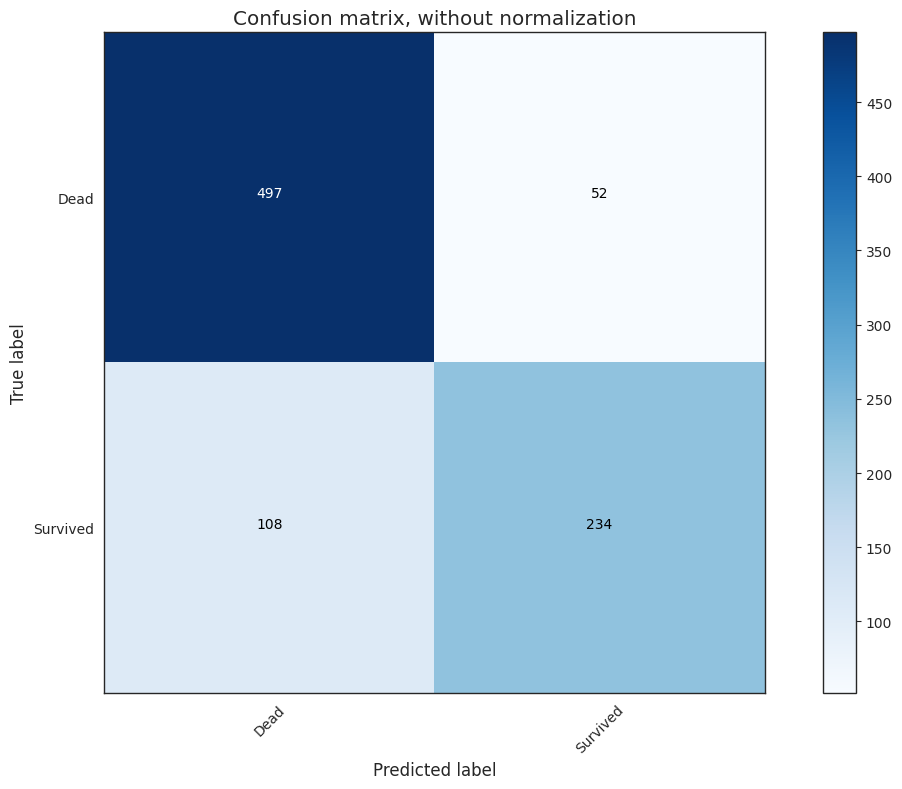

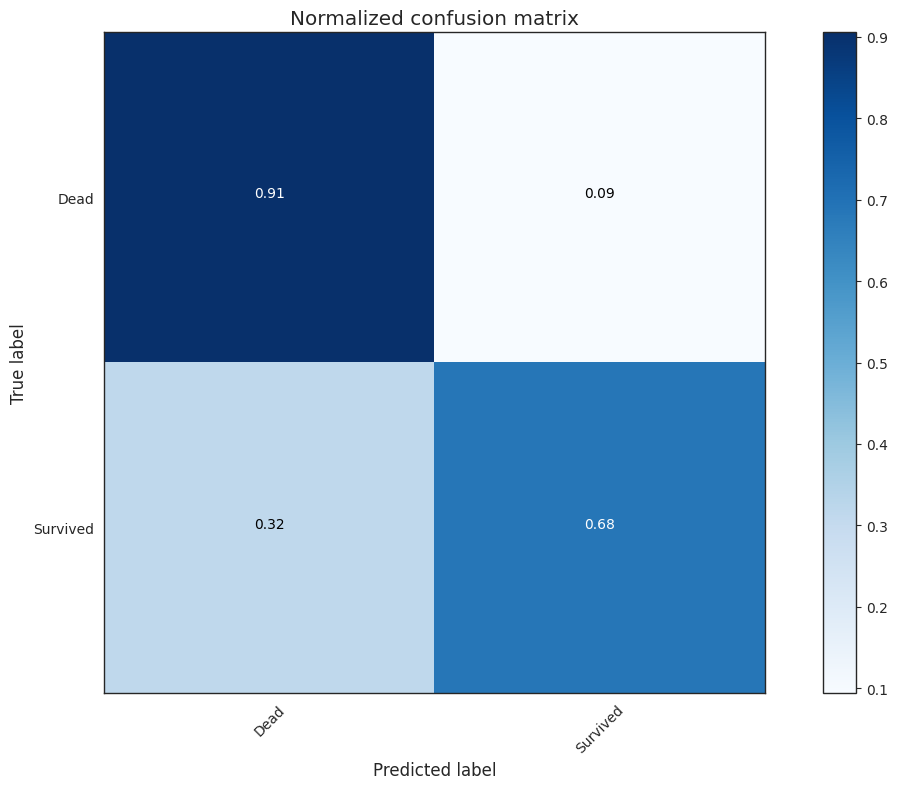

In [108]:
#Compute confusion matrix 
cnf_matrix = metrics.confusion_matrix(data1['Survived'], Tree_Predict)
np.set_printoptions(precision=2)

class_names = ['Dead', 'Survived']

#Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes=class_names, 
                      title='Confusion matrix, without normalization')

#Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes=class_names, 
                      normalize=True, 
                      title='Normalized confusion matrix')

### Tune Models with Hyper-Parameters
We will tune our model using ParameterGrid, GridSearchCV, and customized sklearn scoring. We will then visualize our tree with graphviz.

In [109]:
#base model
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results = model_selection.cross_validate(dtree, data1[data1_x_bin],\
                                              data1[Target], cv=cv_split,\
                                              return_train_score=True)
dtree.fit(data1[data1_x_bin], data1[Target])

print('Before DT Parameters: ', dtree.get_params())
print('\nBefore DT Training w/bin score mean: {:.2f}'.format\
      (base_results['train_score'].mean()*100))
print('Before DT Test w/bin score mean: {:.2f}'.format\
      (base_results['test_score'].mean()*100))
print('Before DT Test w/bin score 3*std: +/- {:.2f}'.format\
      (base_results['test_score'].std()*100*3))
print('-'*10)

#tune hyper-parameters
param_grid = {
    'criterion': ['gini', 'entropy'], #scoring methodology
    'max_depth': [2,4,6,8,10,None], #max depth tree can grow
    'random_state': [0] #seed or control random number generator
}

#choose best model with grid_search
tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(),
                                          param_grid=param_grid,
                                          scoring = 'roc_auc',
                                          cv = cv_split,
                                          return_train_score=True)
tune_model.fit(data1[data1_x_bin], data1[Target])

print('After DT Parameters: ', tune_model.best_params_)
print('After DT Training w/bin score mean: {:.2f}'.format\
      (tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print('After DT Test w/bin score mean: {:.2f}'.format\
      (tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('After DT Test w/bin score 3*std: +/- {:.2f}'.format\
      (tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))

Before DT Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}

Before DT Training w/bin score mean: 89.51
Before DT Test w/bin score mean: 82.09
Before DT Test w/bin score 3*std: +/- 5.57
----------
After DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
After DT Training w/bin score mean: 89.35
After DT Test w/bin score mean: 87.40
After DT Test w/bin score 3*std: +/- 5.00


### Tune Model with Feature Selection
Using recursive feature elimination (RFE) with cross_validation(CV)

In [110]:
#base model
print('Before DT RFE Training Shape Old: ', data1[data1_x_bin].shape)
print('Before DT RFE Training Columns Old: ', data1[data1_x_bin].columns.values)

print('\nBefore DT RFE Training w/bin score mean: {:.2f}'.format\
      (base_results['train_score'].mean()*100))
print('Before DT RFE Test w/bin score mean: {:.2f}'.format\
      (base_results['test_score'].mean()*100))
print('Before DT RFE Test w/bin score 3*std: +/- {:.2f}'.format\
      (base_results['test_score'].std()*100*3))
print('-'*10)

#feature selection
dtree_rfe = feature_selection.RFECV(dtree, step=1, scoring='accuracy', cv=cv_split)
dtree_rfe.fit(data1[data1_x_bin], data1[Target])

#transform x&y to reduce features and fit new model
X_rfe = data1[data1_x_bin].columns.values[dtree_rfe.get_support()]
rfe_results = model_selection.cross_validate(dtree, data1[X_rfe], data1[Target], cv=cv_split, return_train_score=True)

print('After DT RFE Training Shape New: ',data1[X_rfe].shape)
print('After DT RFE Training Columns New: ',X_rfe)

print('\nAfter DT RFE Training w/bin score mean: {:.2f}'.format\
      (rfe_results['train_score'].mean()*100))
print('After DT RFE Test w/bin score mean: {:.2f}'.format\
      (rfe_results['test_score'].mean()*100))
print('After DT RFE Test w/bin score 3*std: +/- {:.2f}'.format\
      (rfe_results['test_score'].std()*100*3))
print('-'*10)

#tune rfe model
rfe_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(),
                                          param_grid=param_grid,
                                          scoring = 'roc_auc',
                                          cv = cv_split,
                                          return_train_score=True)
rfe_tune_model.fit(data1[X_rfe], data1[Target])
print('After DT RFE Tuned Parameters: ', rfe_tune_model.best_params_)
print('After DT RFE Tuned Training w/bin score mean: {:.2f}'.format\
      (rfe_tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print('After DT RFE Tuned Test w/bin score mean: {:.2f}'.format\
      (rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('After DT RFE Tuned Test w/bin score 3*std: +/- {:.2f}'.format\
      (rfe_tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))

Before DT RFE Training Shape Old:  (891, 7)
Before DT RFE Training Columns Old:  ['Sex_Code' 'Pclass' 'Embarked_Code' 'Title_Code' 'FamilySize'
 'AgeBin_Code' 'FareBin_Code']

Before DT RFE Training w/bin score mean: 89.51
Before DT RFE Test w/bin score mean: 82.09
Before DT RFE Test w/bin score 3*std: +/- 5.57
----------
After DT RFE Training Shape New:  (891, 6)
After DT RFE Training Columns New:  ['Sex_Code' 'Pclass' 'Title_Code' 'FamilySize' 'AgeBin_Code'
 'FareBin_Code']

After DT RFE Training w/bin score mean: 88.16
After DT RFE Test w/bin score mean: 83.06
After DT RFE Test w/bin score 3*std: +/- 6.22
----------
After DT RFE Tuned Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
After DT RFE Tuned Training w/bin score mean: 89.39
After DT RFE Tuned Test w/bin score mean: 87.34
After DT RFE Tuned Test w/bin score 3*std: +/- 6.21


# Validate and Implement

In [111]:
#why chose one model, when you can pick them all with voting classifier
#we are using VotingClassifier

vote_est = [
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    ('lr', linear_model.LogisticRegressionCV()),
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    ('knn', neighbors.KNeighborsClassifier()),
    ('svc', svm.SVC(probability=True)),
    ('xgb', XGBClassifier())
]

In [112]:
#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators=vote_est, voting='hard')
vote_hard_cv = model_selection.cross_validate(vote_hard,
                                              data1[data1_x_bin],
                                              data1[Target],
                                              cv=cv_split,
                                              return_train_score=True)
vote_hard.fit(data1[data1_x_bin],data1[Target])

print('Hard Voting Training w/bin score mean: {:.2f}'.format\
      (vote_hard_cv['train_score'].mean()*100))
print('Hard Voting Test w/bin score mean: {:.2f}'.format\
      (vote_hard_cv['test_score'].mean()*100))
print('Hard Voting Test w/bin score 3*std: +/- {:.2f}'.format\
      (vote_hard_cv['test_score'].std()*100*3))
print('-'*10)

#Soft Vote or weighted probabilities
vote_soft= ensemble.VotingClassifier(estimators=vote_est, voting='soft')
vote_soft_cv = model_selection.cross_validate(vote_soft,
                                              data1[data1_x_bin],
                                              data1[Target],
                                              cv=cv_split,
                                              return_train_score=True)
vote_soft.fit(data1[data1_x_bin],data1[Target])

print('Hard Voting Training w/bin score mean: {:.2f}'.format\
      (vote_soft_cv['train_score'].mean()*100))
print('Hard Voting Test w/bin score mean: {:.2f}'.format\
      (vote_soft_cv['test_score'].mean()*100))
print('Hard Voting Test w/bin score 3*std: +/- {:.2f}'.format\
      (vote_soft_cv['test_score'].std()*100*3))
print('-'*10)


Hard Voting Training w/bin score mean: 87.27
Hard Voting Test w/bin score mean: 81.83
Hard Voting Test w/bin score 3*std: +/- 4.07
----------
Hard Voting Training w/bin score mean: 87.72
Hard Voting Test w/bin score mean: 82.28
Hard Voting Test w/bin score 3*std: +/- 5.71
----------


In [117]:
data_val['Survived'] = mytree(data_val).astype(int)

submission = data_val[['PassengerId','Survived']]
submission.to_csv("../working/submission.csv", index=False)
print("Submission file created!")

In [118]:
print('Validation Data Distribution: \n', data_val['Survived'].value_counts(normalize = True))
submission.sample(10)

Validation Data Distribution: 
 Survived
0    0.712919
1    0.287081
Name: proportion, dtype: float64


,PassengerId,Survived
355,1247,0
182,1074,1
162,1054,1
358,1250,0
126,1018,0
370,1262,0
192,1084,0
304,1196,1
190,1082,0
116,1008,0


### Credit
This notebook is credited to the Kaggle notebook I found titled 'A Data Science Framework: To Achieve 99% Accuracy' that uses the Titanic Dataset. This notebook follows step by step based on the tutorial I found and it is entirely for my own educational purpose. 

[A Data Science Framework: To Achieve 99% Accuracy](https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy/notebook#5.13-Tune-Model-with-Feature-Selection)